## Prédiction de Comportements d'Achat avec SVM

Ce notebook explore l'utilisation des Machines à Vecteurs de Support (SVM) pour prédire les comportements d'achat des utilisateurs d'un réseau social, en se basant sur des données telles que l'âge et le salaire estimé. Le projet suit plusieurs étapes clés :

- **Chargement et Exploration des Données** : Introduction au jeu de données "Social_Network_Ads.csv".
- **Prétraitement** : Nettoyage des données et normalisation.
- **Modélisation avec SVM** : Construction et entraînement d'un modèle SVM linéaire.
- **Évaluation du Modèle** : Analyse des performances à l'aide de la matrice de confusion et de l'exactitude.

## Objectif
Fournir un aperçu de l'efficacité des SVM pour classer les comportements d'achat basés sur des caractéristiques utilisateur simples, en passant par les étapes de préparation des données jusqu'à l'évaluation du modèle.



### importations des librairies:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

### Chargement des données : Récupération des données depuis le fichier 'Social_Network_Ads.csv'.

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


### Aperçu du Dataset

Avant d'analyser le dataset, nous allons obtenir un aperçu de base de la structure et des caractéristiques des données. Les fonctions suivantes de Pandas seront utilisées pour cet aperçu :

- `df.shape` : Cette fonction retourne les dimensions du DataFrame, nous fournissant le nombre de lignes et de colonnes.

- `df.info()` : Cette méthode affiche un résumé concis du DataFrame, y compris le type de données de chaque colonne, le nombre de valeurs non-nulles et l'utilisation de la mémoire. C'est un bon moyen pour obtenir un aperçu des types de données et des valeurs manquantes.

- `df.describe(include='all')` : Cette fonction fournit un résumé statistique des caractéristiques numériques et catégorielles. Cela inclut des informations telles que le nombre de valeurs, la moyenne, l'écart type, les valeurs minimales et maximales, ainsi que les quantiles pour les données numériques. L'argument `include='all'` permet d'inclure également les statistiques descriptives pour les colonnes catégorielles.


In [3]:
df.shape

(400, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.describe(include='all')

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Vérification des Valeurs Manquantes

Pour assurer l'intégrité de notre analyse de données, il est crucial de vérifier l'existence de valeurs manquantes dans notre dataset. Les valeurs manquantes peuvent affecter la qualité des résultats analytiques et peuvent nécessiter un traitement spécifique tel que l'imputation ou la suppression des données manquantes. La commande suivante est utilisée pour détecter et compter les valeurs manquantes pour chaque colonne :

- `df.isnull().sum()` : Cette fonction chaîne deux méthodes, `isnull()` et `sum()`. `isnull()` retourne un DataFrame où chaque cellule est soit True si la valeur est manquante, soit False si elle est présente. En ajoutant `sum()`, nous aggrégeons par colonne le nombre total de True valeurs, ce qui nous donne le compte exact de valeurs manquantes pour chaque attribut dans le DataFrame.

In [6]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Gestion des Données Dupliquées

La présence de lignes dupliquées dans un dataset peut être le résultat d'erreurs de collecte de données ou de fusion de sources de données multiples. Les doublons peuvent conduire à une distorsion des analyses statistiques et des modèles prédictifs. Pour gérer les doublons, nous procédons comme suit :

1. Identification des doublons:
   - `df.duplicated().sum()` : Cette commande nous permet de compter le nombre de cas où des lignes entières sont dupliquées.

2. Traitement des doublons :
   Si des doublons sont trouvés, nous pouvons les supprimer pour ne conserver que les données uniques. La méthode pour supprimer les doublons est `df.drop_duplicates()`, qui ne garde que la première occurrence de chaque ligne dupliquée.

In [7]:
# Comptez les doublons
nombre_doublons = df.duplicated().sum()
print(f'Il y a {nombre_doublons} lignes dupliquées.')

Il y a 33 lignes dupliquées.


In [8]:
# Suppression des doublons, si nécessaire
if nombre_doublons > 0:
    df = df.drop_duplicates()
    print('Les doublons ont été supprimés.')

Les doublons ont été supprimés.


## Exploration des Données 

### Exploration de la Variable 'Purchased'

Nous explorons la distribution de la variable cible `Purchased` dans le dataset pour comprendre la fréquence des achats effectués.

- `df['Purchased'].value_counts()` : Cette commande nous donne le décompte des valeurs uniques dans la colonne `Purchased`, nous aidant à voir rapidement combien de clients ont effectué ou non un achat.

- Visualisation avec un graphique à barres :
   Nous utilisons `sns.countplot` pour créer un graphique à barres qui montre visuellement la répartition des achats. La taille du graphique est définie pour une bonne lisibilité, et la palette de couleurs 'tab10' est utilisée pour une distinction claire. Les titres et les étiquettes sont ajustés pour une meilleure compréhension du graphique.

In [9]:
df['Purchased'].value_counts()

0    229
1    138
Name: Purchased, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9780\171582359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=df, palette='tab10')


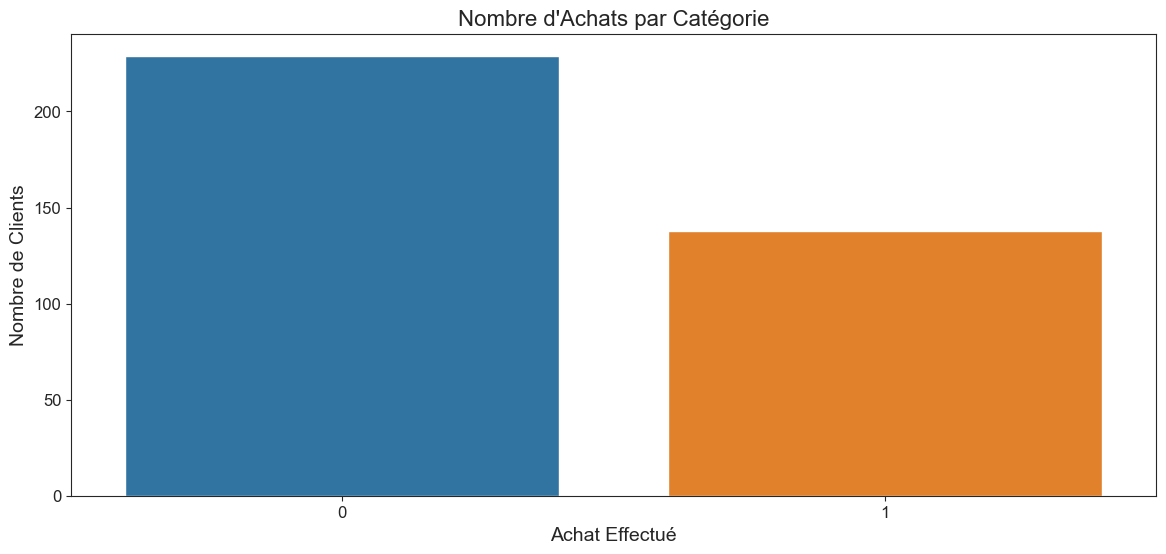

In [10]:
plt.figure(figsize=(14,6))
sns.set_style('ticks') 
sns.countplot(x='Purchased', data=df, palette='tab10')
plt.title('Nombre d\'Achats par Catégorie', fontsize=16) 
plt.xlabel('Achat Effectué', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

### Exploration des Achats par Âge et Salaire

Ce graphique explore l'influence de l'âge et du salaire sur la probabilité d'achat, avec :

- L'âge sur l'axe horizontal et le salaire estimé sur le vertical.
- Des points colorés selon que le client a réalisé un achat ou non, facilitant l'identification des modèles de comportement.
- Titres et légendes détaillés améliorent la clarté et la compréhension des données présentées.

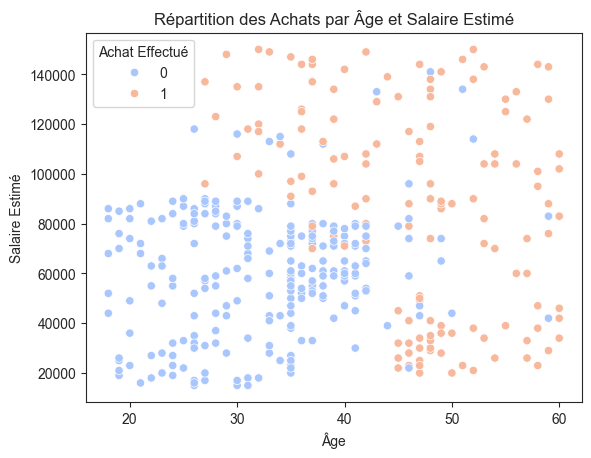

In [11]:
# Scatter plot avec 'Age' sur l'axe des x, 'EstimatedSalary' sur l'axe des y
# et la colonne 'Purchased' comme hue pour différencier les points
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='coolwarm')
plt.title('Répartition des Achats par Âge et Salaire Estimé')
plt.xlabel('Âge')
plt.ylabel('Salaire Estimé')
plt.legend(title='Achat Effectué')
plt.show()

### Visualisation des Corrélations entre Caractéristiques

Affiche la corrélation entre les variables du dataset avec une heatmap, mettant en évidence la relation linéaire entre chaque paire de caractéristiques. 

- `corr = df.corr()` calcule les coefficients de corrélation.
- La visualisation via `sns.heatmap` illustre ces corrélations avec des couleurs pour indiquer l'intensité et des annotations pour les valeurs exactes, rendant les tendances immédiatement apparentes.


In [12]:
corr = df.corr()
corr

,Age,EstimatedSalary,Purchased
Age,1.000000,0.167771,0.626164
EstimatedSalary,0.167771,1.000000,0.375624
Purchased,0.626164,0.375624,1.000000


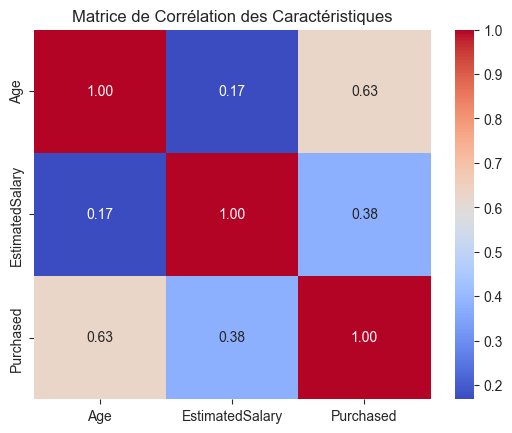

In [13]:
# Heatmap des corrélations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

##  Prétraitement et Normalisation des Données pour l'Apprentissage Automatique

### Préparation des Données pour l'Entraînement et le Test

Afin de préparer notre modèle d'apprentissage automatique, nous divisons nos données en ensembles d'entraînement et de test. Cette étape est cruciale pour évaluer la performance du modèle sur des données non vues.

- **Sélection des Caractéristiques et de la Variable Cible** :
  - `X` contient toutes les caractéristiques indépendantes, sélectionnées à partir de toutes les colonnes sauf la dernière du dataset.
  - `y` représente la variable cible, extraite de la dernière colonne du dataset.

- **Division en Ensembles d'Entraînement et de Test** :
  - Utilisation de `train_test_split` avec un `test_size` de 0.25 pour allouer 25% des données au test et le reste à l'entraînement.
  - `random_state` est fixé pour assurer la reproductibilité des résultats lors de divisions successives.

Ces ensembles nous permettront d'entraîner notre modèle et d'évaluer sa capacité à généraliser sur de nouvelles données.


In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Normalisation des Caractéristiques

Afin d'améliorer la performance et la stabilité de notre modèle d'apprentissage automatique, nous normalisons les caractéristiques d'entrée. Cette étape est essentielle lorsque les variables d'entrée ont des gammes de valeurs très différentes.

- **Utilisation de `StandardScaler`** :
  - `StandardScaler` transforme chaque caractéristique en ayant une moyenne de 0 et un écart type de 1, rendant les données plus homogènes et facilitant l'apprentissage du modèle.
  
- **Application au jeu de données** :
  - La méthode `fit_transform` est appliquée sur `X_train` pour calculer les paramètres de normalisation (moyenne et écart type) et les appliquer, tandis que `transform` est utilisé sur `X_test` pour appliquer ces mêmes paramètres. Cela garantit que les transformations sont cohérentes entre les ensembles d'entraînement et de test.

Cette normalisation aide à prévenir les biais dans l'entraînement du modèle dus à l'échelle des caractéristiques et améliore généralement les résultats de l'apprentissage.


In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[ 1.98405766  2.09225669]
 [ 1.13857854  0.50879998]
 [ 1.32646279  2.29378754]
 [-0.27055332 -0.32611356]
 [-0.08266907  0.04815802]
 [-1.49180093 -0.21095308]
 [-1.7736273   0.42242961]
 [-1.67968518  0.45121973]
 [ 1.79617341 -1.07465674]
 [-1.86756942  0.45121973]
 [ 1.51434704  0.96944193]
 [-0.55237969  1.34371352]
 [ 0.66886792 -1.27618759]
 [ 0.1991573   0.04815802]
 [-0.64632181  0.16331851]
 [ 0.01127305 -0.15337283]
 [ 0.29309943 -0.52764442]
 [ 0.38704155  0.278479  ]
 [-1.11603243  0.45121973]
 [ 1.04463642 -0.90191601]
 [ 0.76281005 -1.39134808]
 [-0.08266907  0.24968888]
 [-0.08266907 -0.2397432 ]
 [-0.45843756 -0.84433576]
 [ 1.32646279  1.94830608]
 [-0.83420606  0.13452839]
 [ 0.76281005  0.33605924]
 [-0.74026394 -0.2397432 ]
 [-0.27055332 -1.44892833]
 [-0.55237969  0.85428144]
 [-1.20997456 -1.07465674]
 [ 0.95069429  2.03467645]
 [ 0.95069429  0.56638022]
 [-0.08266907 -1.07465674]
 [-0.45843756 -1.13223698]
 [-0.08266907  1.91951596]
 [-1.7736273  -1.30497772]
 

### Modélisation avec Support Vector Machine (SVM)

Après la préparation et la normalisation de nos données, nous passons à l'étape de modélisation. Ici, nous utilisons un Support Vector Machine (SVM) avec un noyau linéaire pour classifier nos données.

- **Initialisation du classificateur SVM** :
  - `SVC(kernel = 'linear', random_state = 0)` crée une instance du classificateur SVM avec un noyau linéaire. Le paramètre `random_state` est fixé pour assurer la reproductibilité des résultats.

- **Entraînement du modèle** :
  - La méthode `fit` est appelée sur notre classificateur en lui passant les ensembles d'entraînement `X_train` et `y_train`. Cela permet au modèle d'apprendre à distinguer les différentes classes de notre variable cible à partir des caractéristiques fournies.

Cette étape est cruciale pour construire un modèle capable de prédire efficacement la classe de nouvelles observations.


In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Prédiction sur l'Ensemble de Test

Utilisation de `classifier.predict(X_test)` pour obtenir les prédictions `y_pred` du modèle SVM sur l'ensemble de test.

In [20]:
y_pred = classifier.predict(X_test)

## Évaluation du Modèle

### Précision du Modèle

Calcul et affichage de la précision avec `accuracy_score(y_test, y_pred)`.

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8260869565217391


### Rapport de Classification

Affichage du rapport de classification pour évaluer la performance détaillée du modèle.

In [22]:
print ('Classification report :')
print('\n')
print(classification_report(y_test,y_pred))

Classification report :


              precision    recall  f1-score   support

           0       0.78      0.96      0.86        51
           1       0.93      0.66      0.77        41

    accuracy                           0.83        92
   macro avg       0.85      0.81      0.82        92
weighted avg       0.85      0.83      0.82        92



### Matrice de Confusion

Génération et affichage de la matrice de confusion pour visualiser les performances du modèle.


In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49  2]
 [14 27]]


### Visualisation de la Matrice de Confusion

Affiche la matrice de confusion du SVM linéaire avec `ConfusionMatrixDisplay`. Style défini sur 'ticks' pour une meilleure lisibilité.


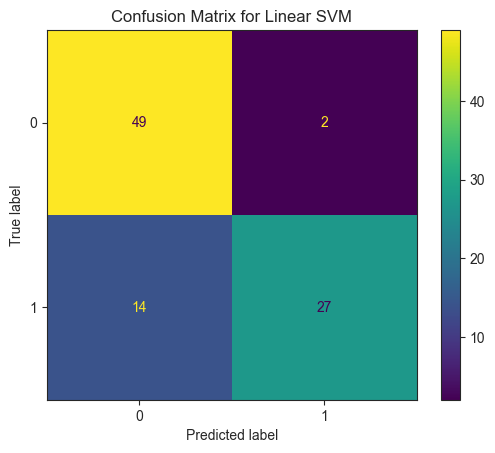

In [24]:
sns.set_style('ticks')
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix for Linear SVM")
plt.show()

## Prédiction pour un Nouvel Échantillon

Ce code illustre comment faire une prédiction avec le modèle SVM linéaire pour une nouvelle observation. L'observation, représentant une personne de 30 ans avec un salaire estimé de 87,000, est d'abord normalisée à l'aide de `sc.transform` avant d'être passée à `classifier.predict` pour la prédiction.

- La nouvelle observation est : `[30, 87000]`.
- `sc.transform([[30,87000]])` : Applique la normalisation.
- `classifier.predict(...)`: Effectue la prédiction sur les données normalisées.


In [25]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]
